# Diabetes Predictor

**Import the required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 

**Read the data set**

In [2]:
diabetesDataSet = pd.read_csv("diabetes.csv")
diabetesDataSet.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1


**Exploring the dataset**

In [3]:
# Returns number of rows and columns of the dataset
diabetesDataSet.shape

(2000, 9)

In [4]:
# Returns an object with all of the column headers 
diabetesDataSet.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
diabetesDataSet.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Returns basic information on all columns
diabetesDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


**Data preprocessing**

In [7]:
# check for missing values in all the columns
diabetesDataSet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Identify the unique elements of the categorical data variable "Outcome"**

In [8]:
print(diabetesDataSet['Outcome'].unique())

[1 0]


**Count the number of unique elements of the categorical data variable "Outcome"**

In [9]:
diabetesDataSet['Outcome'].value_counts()      # where, 0===> diabetes not diagnosed and 1 ===> diabetes diagnosed

0    1316
1     684
Name: Outcome, dtype: int64

Text(0, 0.5, 'Count')

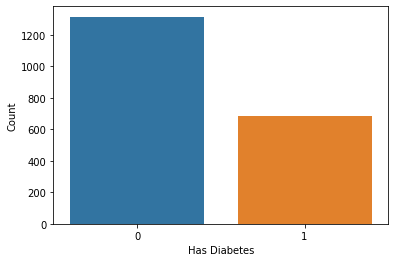

In [10]:
# graphical plot of the number of patient records having diabetes or not.
sb.countplot(diabetesDataSet['Outcome'], label = "Count")
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

**Exploratory Data Analysis (EDA)**

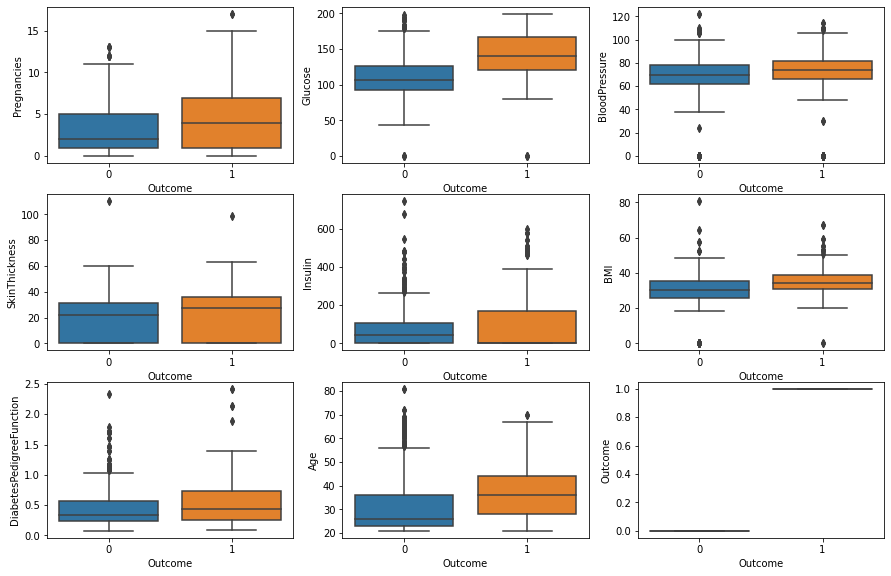

In [11]:
plt.figure(figsize=(15,27))
j= 1
for columns in diabetesDataSet.columns:
    plt.subplot(8,3,j)
    sb.boxplot(diabetesDataSet['Outcome'],diabetesDataSet[columns])
    plt.xlabel("Outcome")
    plt.ylabel("%s"%columns)
    j = j +1
plt.show()

**Correlation matrix**

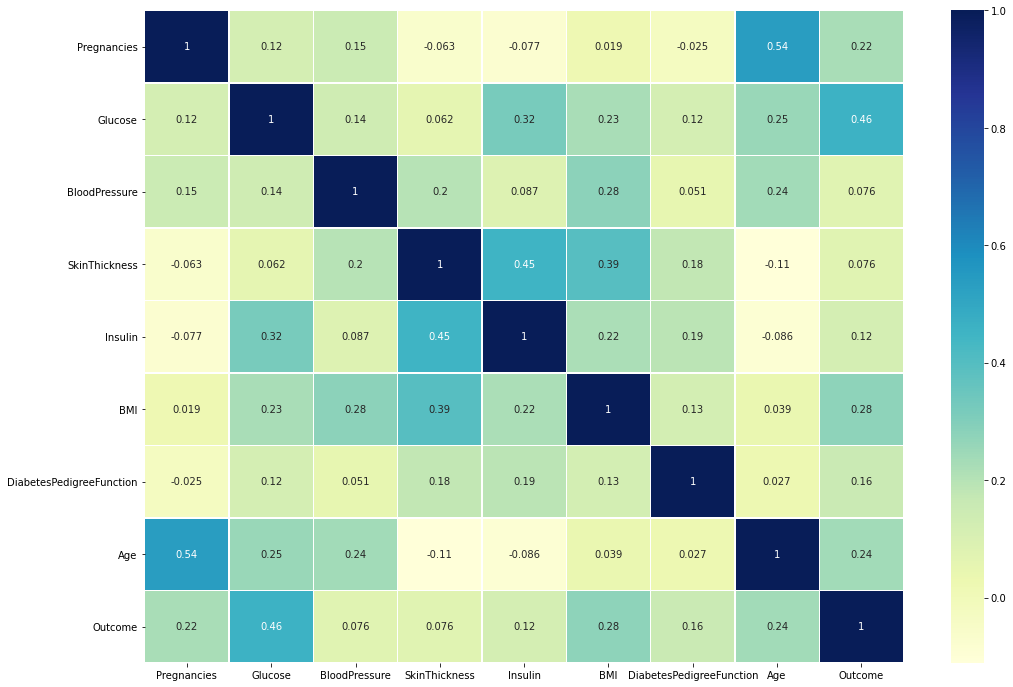

In [12]:
# check for highest feature correlation with the target variable
diabetesCorrelationMatrix=diabetesDataSet.corr()
plt.figure(figsize=(17,12)) 
sb.heatmap(diabetesCorrelationMatrix, annot=True,linewidths=.5,cmap="YlGnBu")

**Data Cleaning**

In [13]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
diabetesDataSet_copy = diabetesDataSet.copy(deep=True)
diabetesDataSet_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetesDataSet_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetesDataSet_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

/home/varshita/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/varshita/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/varshita/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/varshita/anaconda3/lib/python

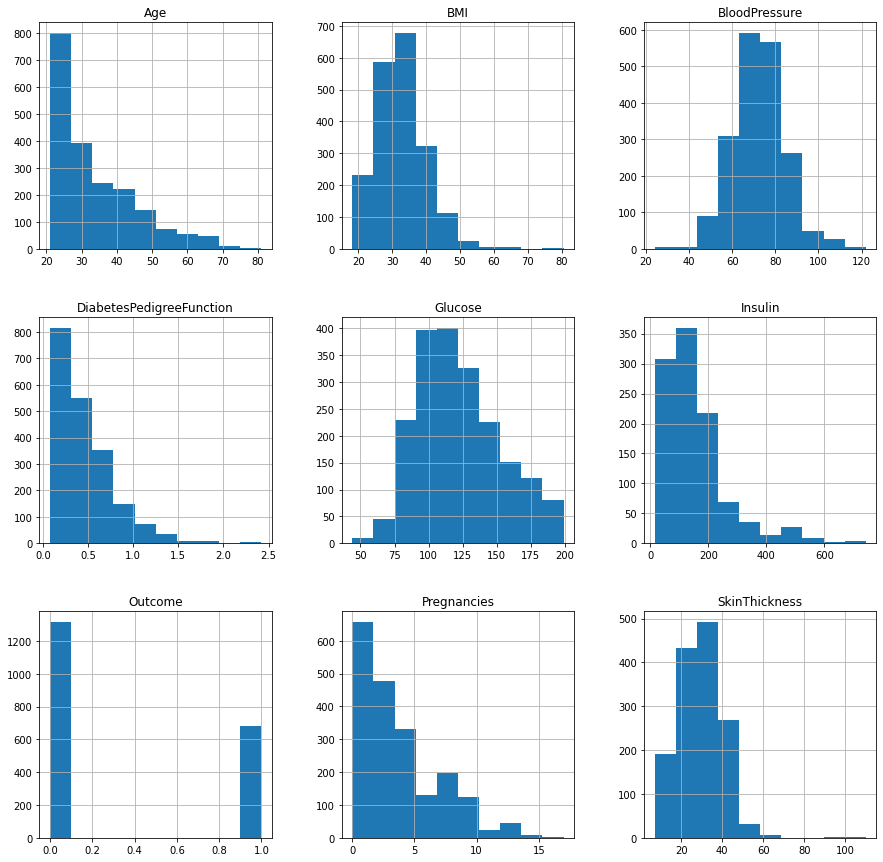

In [14]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = diabetesDataSet_copy.hist(figsize = (15,15))

In [15]:
# Replacing NaN value by mean, median depending upon distribution
diabetesDataSet_copy['Glucose'].fillna(diabetesDataSet_copy['Glucose'].mean(), inplace=True)
diabetesDataSet_copy['BloodPressure'].fillna(diabetesDataSet_copy['BloodPressure'].mean(), inplace=True)
diabetesDataSet_copy['SkinThickness'].fillna(diabetesDataSet_copy['SkinThickness'].median(), inplace=True)
diabetesDataSet_copy['Insulin'].fillna(diabetesDataSet_copy['Insulin'].median(), inplace=True)
diabetesDataSet_copy['BMI'].fillna(diabetesDataSet_copy['BMI'].median(), inplace=True)

/home/varshita/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/varshita/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/varshita/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/varshita/anaconda3/lib/python

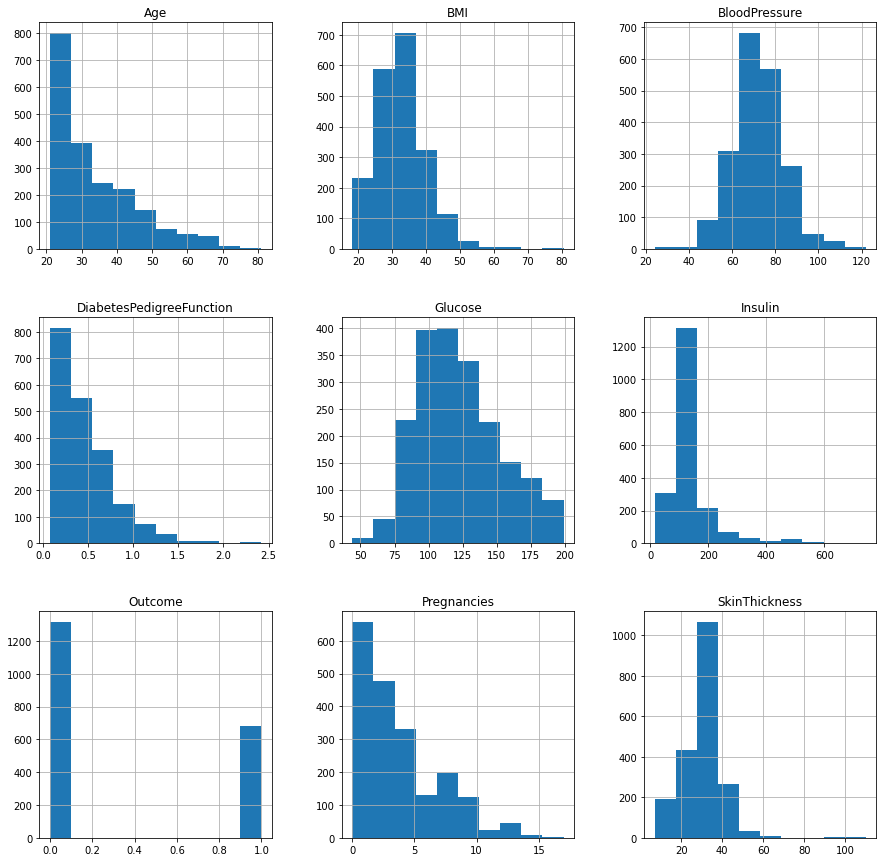

In [16]:
# Plotting histogram of dataset after replacing NaN values
p = diabetesDataSet_copy.hist(figsize=(15,15))

In [17]:
diabetesDataSet_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Prepare the data for sampling**

In [18]:
X = diabetesDataSet.drop("Outcome",axis = 1)
Y = diabetesDataSet["Outcome"]

**Split the data into training and testing sets**

In [19]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=40)
print('X_train size: {}, X_test size: {}'.format(xtrain.shape, xtest.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [21]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(xtrain, ytrain)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.763125
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.910625
2,random_forest,{'n_estimators': 20},0.950000
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.863750


In [23]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), xtrain, ytrain, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 96.0%


**Create a Random Forest Model**

In [24]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=20, random_state=0)

In [25]:
ypred = classifier.predict(xtest)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(xtest)
cm = confusion_matrix(ytest, ypred)
cm

array([[261,   0],
       [ 11, 128]])

**Confusion matrix and Accuracy score for Random Forest Classification**

The accuracy score for Random Forest Classifier is 0.97


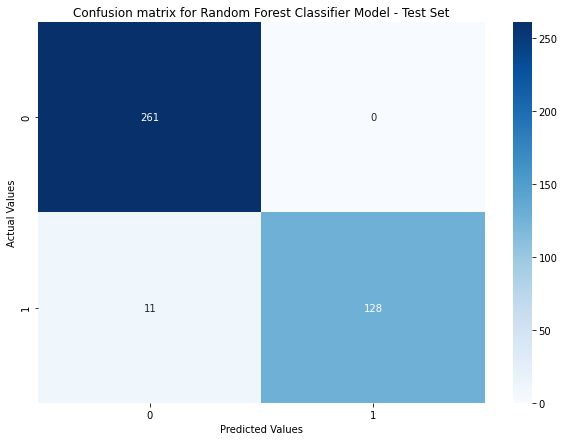

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("The accuracy score for Random Forest Classifier is %.2f"%accuracy_score(ytest,ypred))
plt.figure(figsize=(10,7))
p = sb.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [28]:
# Classification Report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       261
           1       1.00      0.92      0.96       139

    accuracy                           0.97       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.97      0.97      0.97       400



**Predictions**

In [29]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [30]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [31]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Oops! You have diabetes.
